In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
cols = ['flength' , 'fwidth' , 'fsize' , 'fconc' , 'fconc1' , 'fAsym' , 'fM3long' , 'fM3Trans' , 'fAlpha' , 'fDist' , 'class']
df_raw = pd.read_csv(r"D:\datasets\magic-gamma-telescope\magic04.data" , names=cols)
df_raw.head()

,flength,fwidth,fsize,fconc,fconc1,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df_raw['class'] = (df_raw['class'] == 'g').astype(int)

"""by giving it a condition it will split 
the given data into two chuncks Trues and Falses and replace 1 for T and 0 for F"""

In [8]:
df_raw['class'].unique() #this method returns the unique values of 'class' column

array([1, 0])

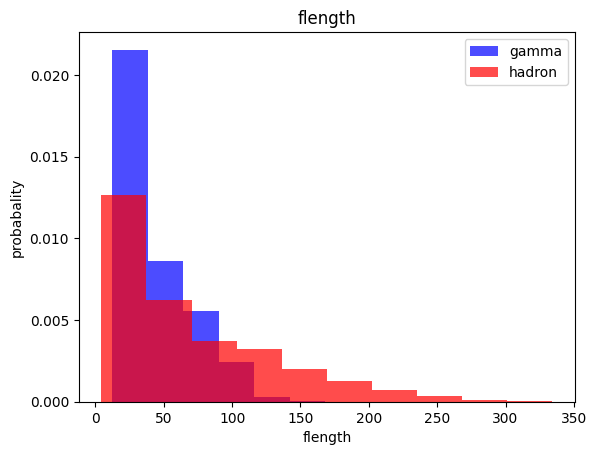

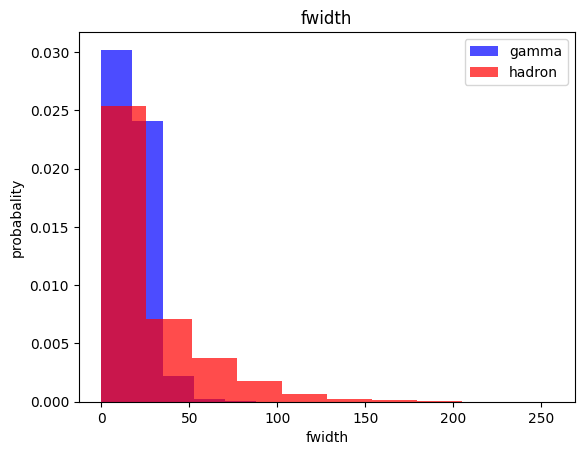

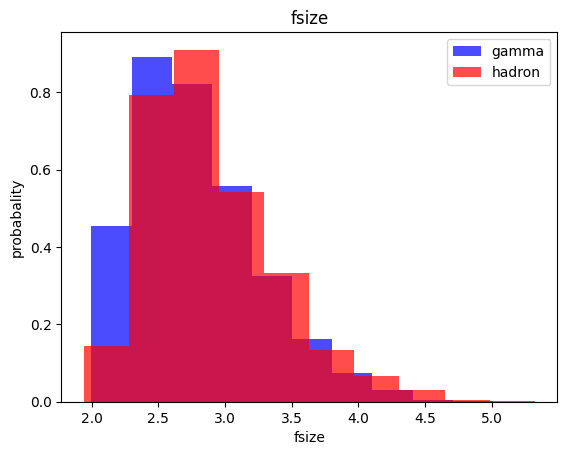

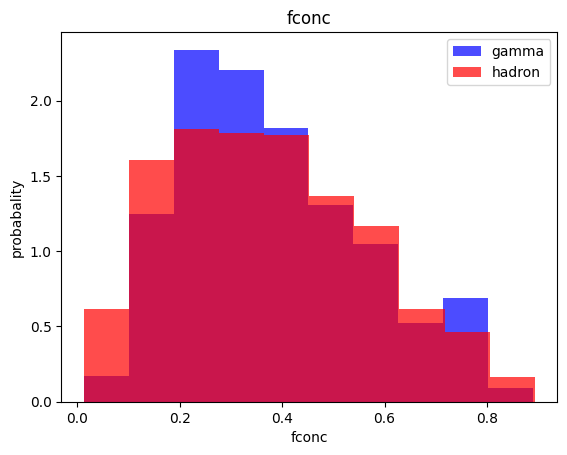

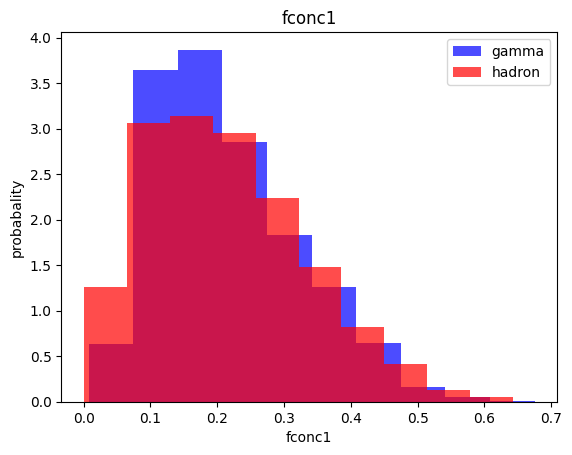

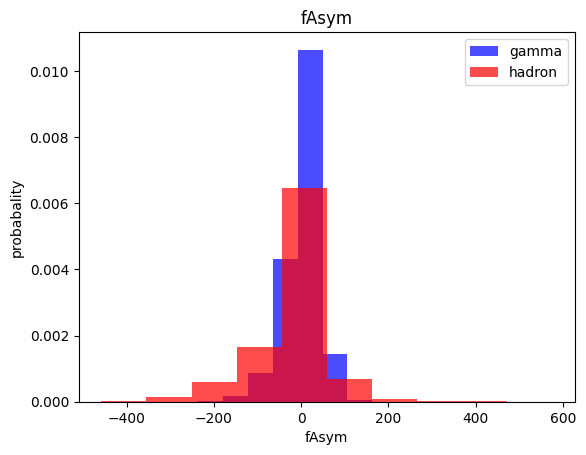

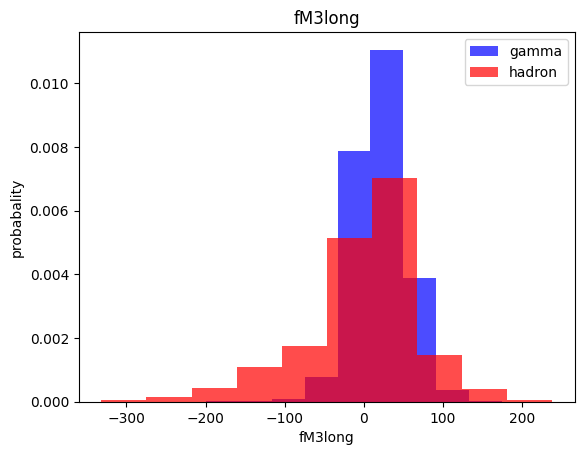

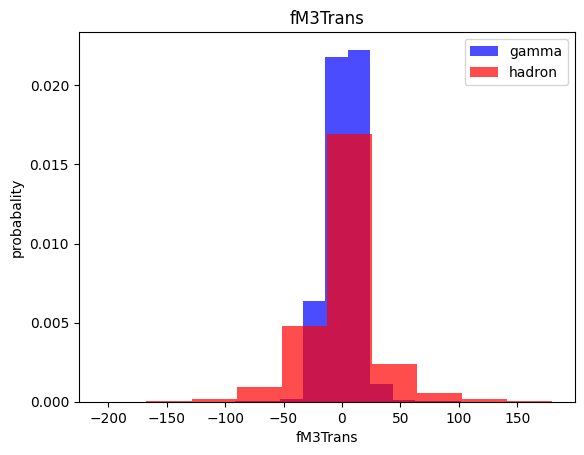

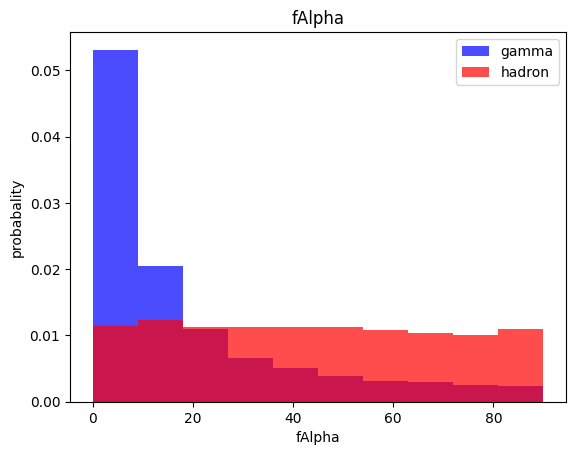

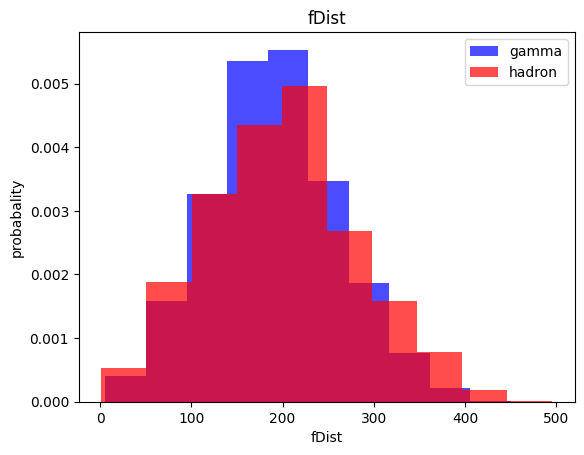

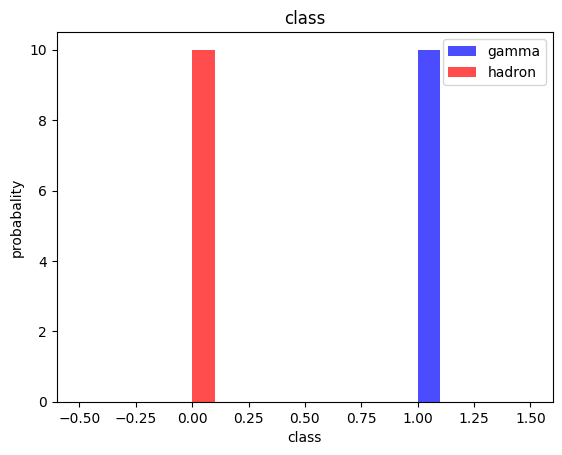

In [9]:
for label in cols :
    plt.hist(df_raw[df_raw['class']==1][label] ,color = 'blue',label = 'gamma',alpha = 0.7,density = True)
    plt.hist(df_raw[df_raw['class']==0][label] ,color = 'red',label = 'hadron',alpha = 0.7,density = True)
    plt.title(label)
    plt.ylabel("probabality")
    plt.xlabel(label)
    plt.legend()
    plt.show()

explanation of the block above :
first taking the portion of the dataframe where the class column is 1 . 
alpha is transparency , by setting the density to True it it will adjust the length of the hists 

train , validation and test datasets

In [10]:
help(np.split)

Help on _ArrayFunctionDispatcher in module numpy:

split(ary, indices_or_sections, axis=0)
    Split an array into multiple sub-arrays as views into `ary`.

    Parameters
    ----------
    ary : ndarray
        Array to be divided into sub-arrays.
    indices_or_sections : int or 1-D array
        If `indices_or_sections` is an integer, N, the array will be divided
        into N equal arrays along `axis`.  If such a split is not possible,
        an error is raised.

        If `indices_or_sections` is a 1-D array of sorted integers, the entries
        indicate where along `axis` the array is split.  For example,
        ``[2, 3]`` would, for ``axis=0``, result in

        - ary[:2]
        - ary[2:3]
        - ary[3:]

        If an index exceeds the dimension of the array along `axis`,
        an empty sub-array is returned correspondingly.
    axis : int, optional
        The axis along which to split, default is 0.

    Returns
    -------
    sub-arrays : list of ndarrays
    

train , test , valid = np.split(df_raw.sample(frac=1) , [int(0.6*len(df_raw)) , int(0.8*len(df_raw))]) # this is what was in video for splitting the dataset , but as i run this i get an error that dont use df_raw.swapcase as it is getting expired even though i haven't used it directly , it seems like numpy uses that to split the dataframe . so what is the solution ? let's just use pandas methods to split the dataframe . 

In [11]:
df_shuffled = df_raw.sample(frac = 1 , random_state = 42 ) 
train = df_shuffled.iloc[:int(0.6 * len(df_shuffled)) , :]
test = df_shuffled.iloc[int(0.6 * len(df_shuffled)) : int(0.8 * len(df_shuffled)) , :]
valid = df_shuffled.iloc[int(0.8 * len(df_shuffled)) : , :]

what is the code above doing ?
first making a shuffled sample of dataframe in order to get random data in each t,t,v sets . 
frac : gives a sample of the 100% of the dataframe .
random_state : -okay , our computer doesn't realy generate random data it is somehow pseudorandom data . and for each randome_state there is a specific random geerated data . i mean any time by giving the same random_state you will have the same shuffled version of you're data .
and if you don't give that everytime you will have a diffrent data returned .
* iloc method :
  iloc stands for integer location and it is used to select the slices of df by their positions and not lables .
  it takes 2 positional arguments (X,y) x represents the rows and y the columns . [3] third row , [:.3] third column
* loc method : is used for selecting items with the lable : column name or row index

In [12]:
type(train)

pandas.core.frame.DataFrame

In [13]:
help(df_raw.sample)

Help on method sample in module pandas.core.generic:

sample(n: 'int | None' = None, frac: 'float | None' = None, replace: 'bool_t' = False, weights=None, random_state: 'RandomState | None' = None, axis: 'Axis | None' = None, ignore_index: 'bool_t' = False) -> 'Self' method of pandas.core.frame.DataFrame instance
    Return a random sample of items from an axis of object.

    You can use `random_state` for reproducibility.

    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not fo

by inspecting the dataframe , we see that the scale of diffrent columns are so far from each other and this will cause issues later . so next step is to fix this .

In [14]:
def scale_dataset(dataframe , oversample=False) :
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample :
        ros = RandomOverSampler() # the randomoversampler object "ros" here is taking the object which is less and sampling it over and over till the count or size of the two object x , y match
        x , y = ros.fit_resample(x,y)
        
    
    data = np.hstack((x , np.reshape(y,(-1,1)))) # here the tuple in reshape of y is the length of the dimensions and -1 is used instead of len(y)
    data = pd.DataFrame(data , columns = cols)
    
    return data , x , y

In [15]:
type(train)

pandas.core.frame.DataFrame

as you see the values of two kinds don't match so we are gonna oversample our dataset 

In [16]:
train , x_train, y_train = scale_dataset(train, oversample = True )
test , x_test, y_test = scale_dataset(test, oversample = False )
valid , x_valid, y_valid = scale_dataset(valid, oversample = False )

In [17]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7409
7409


kNN: k-nearest neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [19]:
knn_model = KNeighborsClassifier(n_neighbors = 1 )
knn_model.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_pred = knn_model.predict(x_test)

In [21]:
y_test


array([1, 1, 1, ..., 1, 0, 0], shape=(3804,))

In [22]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1354
           1       0.84      0.88      0.86      2450

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [23]:
from sklearn.naive_bayes import GaussianNB


In [26]:
nb_model = GaussianNB()
nb_model.fit(x_train , y_train )
y_pred= nb_model.predict(x_test)

In [27]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.44      0.73      0.55       814
           1       0.91      0.75      0.82      2990

    accuracy                           0.74      3804
   macro avg       0.67      0.74      0.68      3804
weighted avg       0.81      0.74      0.76      3804

